# Homework 5

Gerald I. Nakata

**Github: https://github.com/ichi206/EE399/tree/main/HW5**

In [1]:
# Import Block
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.io import loadmat

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Torch imports
import torch
import torch.nn as nn
import torch.optim as optim

# PCA & MNIST imports
#from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

from torch.utils.data import DataLoader, TensorDataset

import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras.layers import SimpleRNN, Dense
from keras.optimizers import Adam

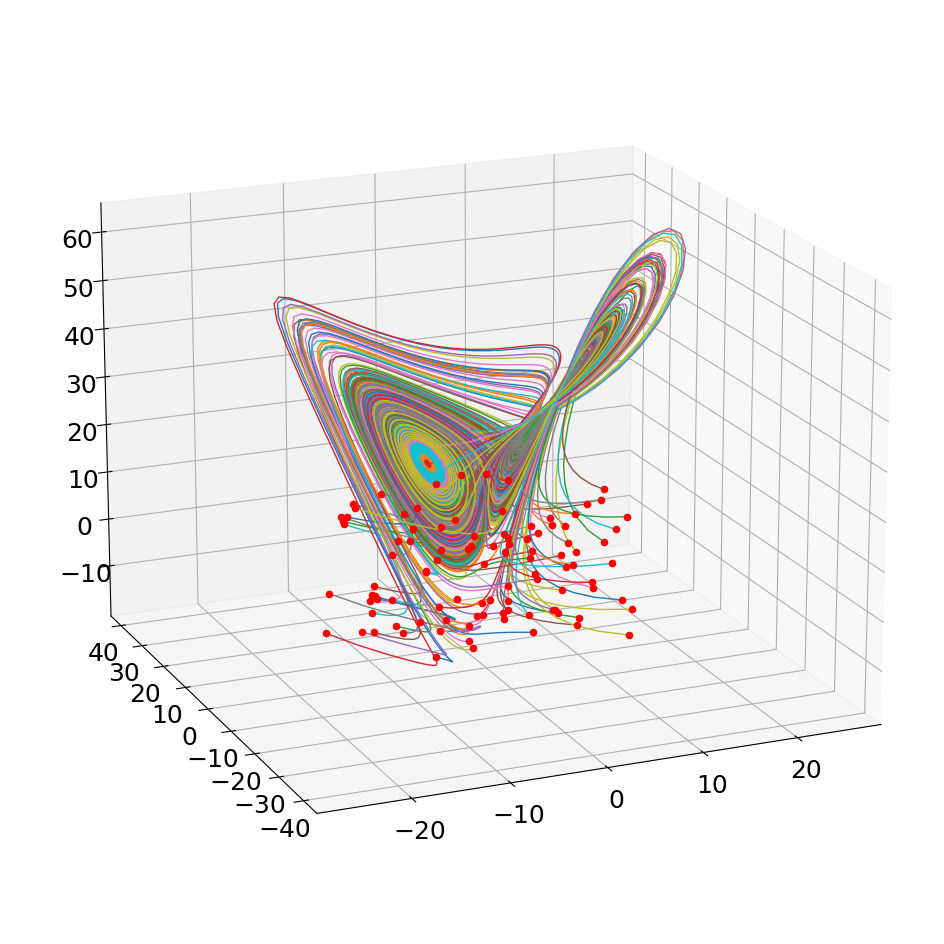

In [2]:
# Given code
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

dt = 0.01
T = 8
t = np.arange(0,T+dt,dt)
beta = 8/3
sigma = 10
rho = 28


nn_input = np.zeros((100*(len(t)-1),3))
nn_output = np.zeros_like(nn_input)

fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})


def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

np.random.seed(123)
x0 = -15 + 30 * np.random.random((100, 3))

x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t)
                  for x0_j in x0])

for j in range(100):
    nn_input[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,:-1,:]
    nn_output[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,1:,:]
    x, y, z = x_t[j,:,:].T
    ax.plot(x, y, z,linewidth=1)
    ax.scatter(x0[j,0],x0[j,1],x0[j,2],color='r')
             
ax.view_init(18, -113)
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
from tensorflow import keras

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

dt = 0.01
T = 8
t = np.arange(0, T + dt, dt)
beta = 8 / 3
sigma = 10
rho = 28

np.random.seed(123)
x0 = -15 + 30 * np.random.random((100, 3))

x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t)
                  for x0_j in x0])

n_steps = [10, 28, 40]  # number of steps to predict into the future

nn_inputs = []
nn_outputs = []

for j in range(100):
    for n in n_steps:
        nn_inputs.append(x_t[j, :-n, :])
        nn_outputs.append(x_t[j, n:, :])

nn_inputs = np.concatenate(nn_inputs)
nn_outputs = np.concatenate(nn_outputs)

In [4]:
# Split data
X_train, X_test, Y_train, Y_test = train_test_split(nn_inputs, nn_outputs, test_size=0.2, random_state=42)

In [5]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(3,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3)
])

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(nn_inputs, nn_outputs, test_size=0.2, random_state=42)
opt = Adam(lr=0.01)
model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


c:\Users\ginak\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4650/4650 [==============================] - 7s 1ms/step - loss: 26.5274 - accuracy: 0.9910 - val_loss: 23.6077 - val_accuracy: 0.9908
Epoch 2/50
4650/4650 [==============================] - 8s 2ms/step - loss: 24.1484 - accuracy: 0.9912 - val_loss: 24.2727 - val_accuracy: 0.9908
Epoch 3/50
4650/4650 [==============================] - 7s 2ms/step - loss: 23.7448 - accuracy: 0.9912 - val_loss: 23.6306 - val_accuracy: 0.9908
Epoch 4/50
4650/4650 [==============================] - 7s 2ms/step - loss: 23.6212 - accuracy: 0.9911 - val_loss: 23.7657 - val_accuracy: 0.9908
Epoch 5/50
4650/4650 [==============================] - 7s 2ms/step - loss: 23.5759 - accuracy: 0.9912 - val_loss: 23.6223 - val_accuracy: 0.9908
Epoch 6/50
4650/4650 [==============================] - 8s 2ms/step - loss: 23.4957 - accuracy: 0.9911 - val_loss: 23.7048 - val_accuracy: 0.9908
Epoch 7/50
4650/4650 [==============================] - 12s 3ms/step - loss: 23.4836 - accuracy: 0.9912 - val_loss: 23.8644 - val_accur

24/24 [==============================] - 0s 1ms/step


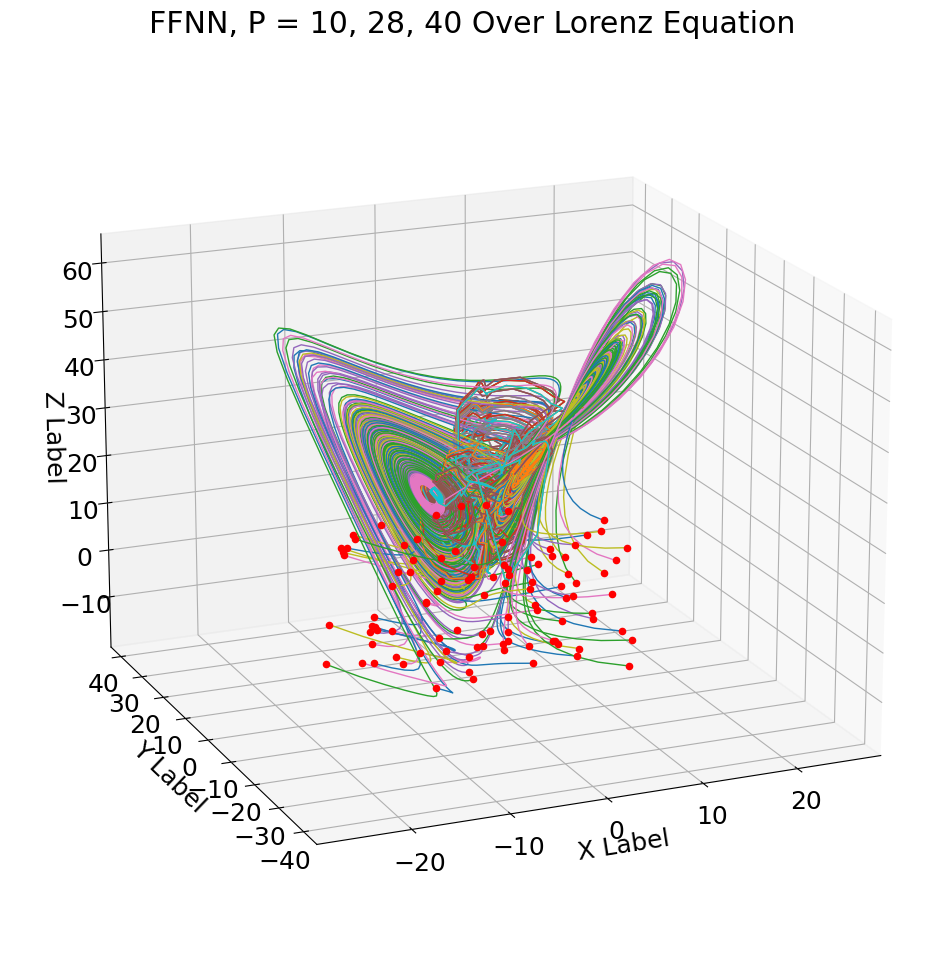

In [6]:
# Plotting Predictions on top of Graph
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})

for j in range(100):
    x, y, z = x_t[j, :, :].T
    ax.plot(x, y, z, linewidth=1)
    ax.scatter(x0[j, 0], x0[j, 1], x0[j, 2], color='r')

    # predict the trajectory for each n_steps
    for n in n_steps:
        predicted_trajectory = model.predict(x_t[j, :-n, :])
        x, y, z = predicted_trajectory.T
        ax.plot(x, y, z, linewidth=1)

ax.view_init(18, -113)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('FFNN, P = 10, 28, 40 Over Lorenz Equation')

plt.show()

In [7]:
# Test at p = 10, 28, 40
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 22.887962341308594
Test accuracy: 0.9909677505493164


In [8]:
# Get data for p = 17, 35
np.random.seed(123)
x0 = -15 + 30 * np.random.random((100, 3))

x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t)
                  for x0_j in x0])

n_steps = [17, 35]  # number of steps to predict into the future

nn_inputs = []
nn_outputs = []

for j in range(100):
    for n in n_steps:
        nn_inputs.append(x_t[j, :-n, :])
        nn_outputs.append(x_t[j, n:, :])

X_test_17_35 = np.concatenate(nn_inputs)
Y_test_17_35 = np.concatenate(nn_outputs)

In [9]:
# Test at p = 17, 35
uniq_score = model.evaluate(X_test_17_35, Y_test_17_35, verbose=0)
print('Test loss:', uniq_score[0])
print('Test accuracy:', uniq_score[1])

Test loss: 17.83917808532715
Test accuracy: 0.9918516278266907


## LSTM (Long Short-Term Memory)

In [10]:
# Define the LSTM model 

LSTMmodel = keras.Sequential([
    keras.layers.LSTM(128, activation='relu', input_shape=(3,1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3)
])
# Compile the model
LSTMmodel.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

# Train the model
LSTMmodel.fit(X_train, Y_train, epochs=50, batch_size=128, validation_data=(X_test, Y_test))

# Evaluate the model
score = LSTMmodel.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
1454/1454 [==============================] - 19s 12ms/step - loss: 25.0988 - accuracy: 0.9911 - val_loss: 23.6561 - val_accuracy: 0.9910
Epoch 2/50
1454/1454 [==============================] - 17s 12ms/step - loss: 22.9429 - accuracy: 0.9911 - val_loss: 22.8307 - val_accuracy: 0.9910
Epoch 3/50
1454/1454 [==============================] - 16s 11ms/step - loss: 22.8334 - accuracy: 0.9911 - val_loss: 22.8576 - val_accuracy: 0.9909
Epoch 4/50
1454/1454 [==============================] - 17s 12ms/step - loss: 22.7773 - accuracy: 0.9911 - val_loss: 22.7072 - val_accuracy: 0.9910
Epoch 5/50
1454/1454 [==============================] - 10s 7ms/step - loss: 22.7152 - accuracy: 0.9911 - val_loss: 23.1576 - val_accuracy: 0.9910
Epoch 6/50
1454/1454 [==============================] - 9s 6ms/step - loss: 22.7126 - accuracy: 0.9911 - val_loss: 23.0731 - val_accuracy: 0.9909
Epoch 7/50
1454/1454 [==============================] - 10s 7ms/step - loss: 22.6652 - accuracy: 0.9911 - val_loss:

24/24 [==============================] - 0s 3ms/step


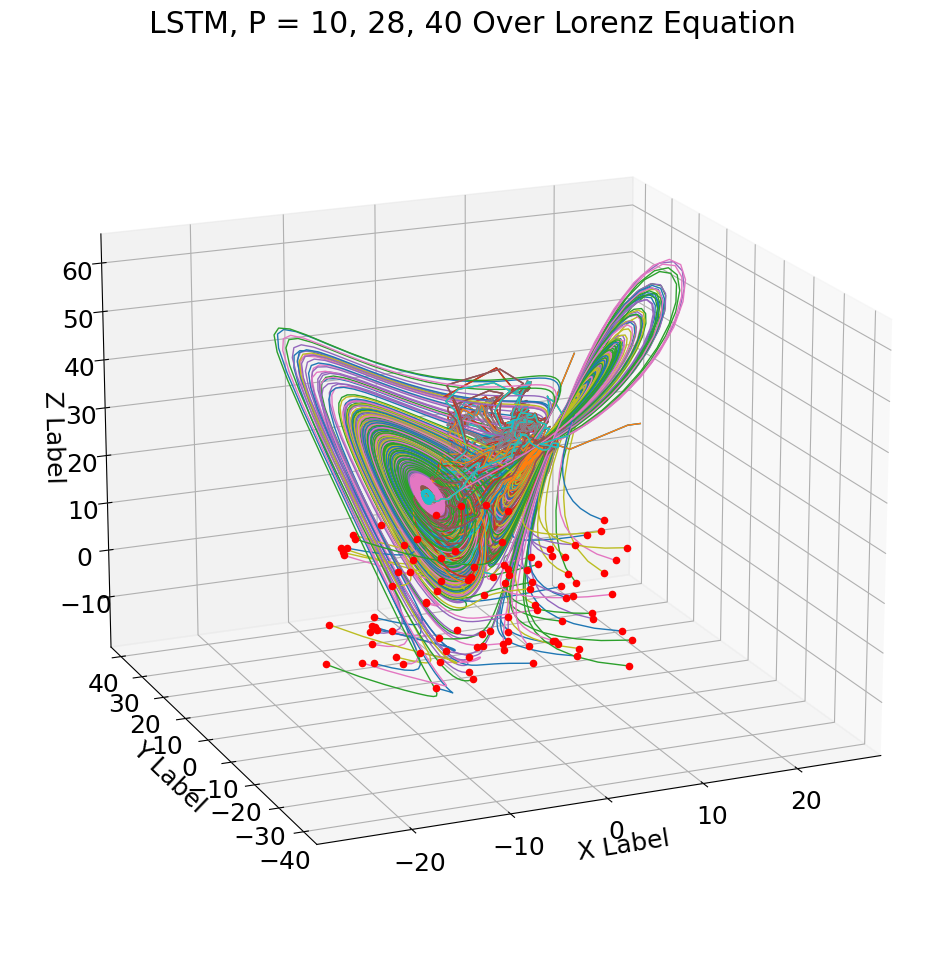

In [11]:
# Plotting Predictions on top of Graph
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
n_steps = [10, 28, 40]  # number of steps to predict into the future

for j in range(100):
    x, y, z = x_t[j, :, :].T
    ax.plot(x, y, z, linewidth=1)
    ax.scatter(x0[j, 0], x0[j, 1], x0[j, 2], color='r')

    # predict the trajectory for each n_steps
    for n in n_steps:
        predicted_trajectory = LSTMmodel.predict(x_t[j, :-n, :])
        x, y, z = predicted_trajectory.T
        ax.plot(x, y, z, linewidth=1)

ax.view_init(18, -113)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('LSTM, P = 10, 28, 40 Over Lorenz Equation')

plt.show()

In [12]:
# Test with p = 17, 35
LSTMscore = LSTMmodel.evaluate(X_test_17_35, Y_test_17_35, verbose=0)
print('Test loss:', LSTMscore[0])
print('Test accuracy:', LSTMscore[1])

Test loss: 17.627849578857422
Test accuracy: 0.9918516278266907


24/24 [==============================] - 0s 3ms/step


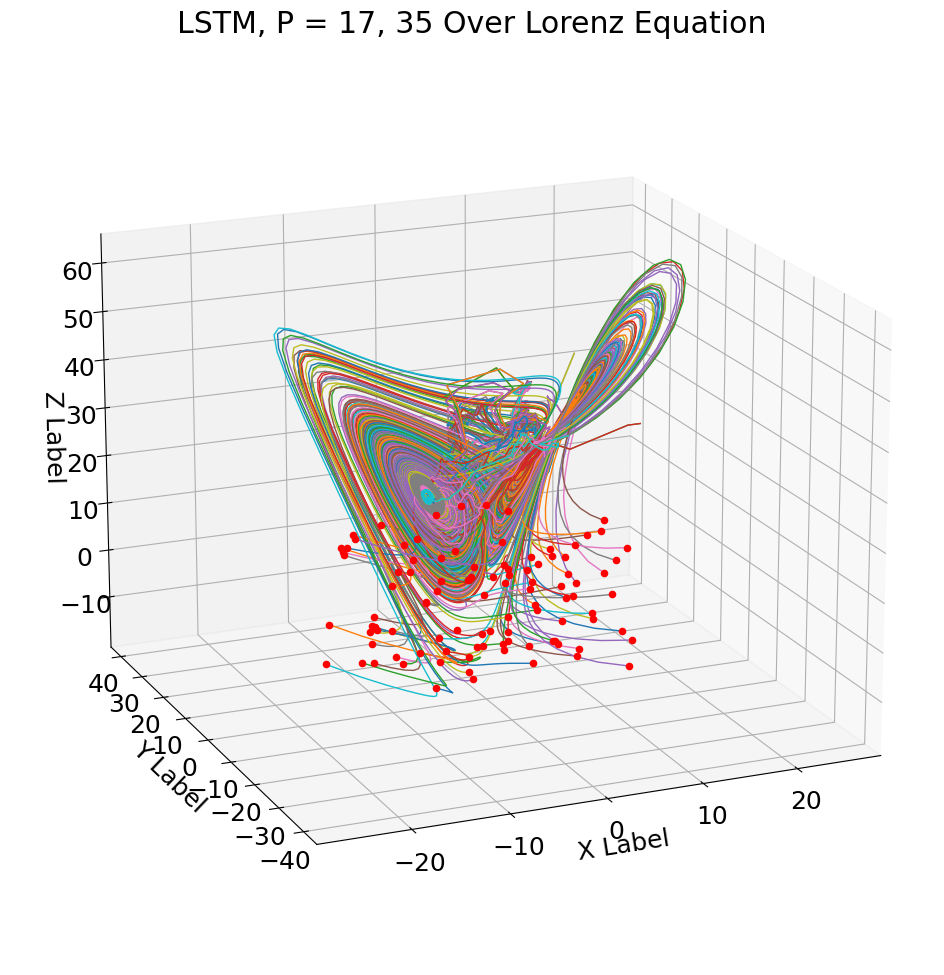

In [13]:
# Plotting Predictions on top of Graph
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
n_steps = [17, 35]  # number of steps to predict into the future

for j in range(100):
    x, y, z = x_t[j, :, :].T
    ax.plot(x, y, z, linewidth=1)
    ax.scatter(x0[j, 0], x0[j, 1], x0[j, 2], color='r')

    # predict the trajectory for each n_steps
    for n in n_steps:
        predicted_trajectory = LSTMmodel.predict(x_t[j, :-n, :])
        x, y, z = predicted_trajectory.T
        ax.plot(x, y, z, linewidth=1)

ax.view_init(18, -113)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('LSTM, P = 17, 35 Over Lorenz Equation')

plt.show()

## RNN (Recurrent Neural Network)

In [14]:
RNNmodel = Sequential([
    keras.layers.SimpleRNN(128, activation='relu', input_shape=(3, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3)
])

# Compile model
RNNmodel.compile(optimizer=opt, loss='mse', metrics=['accuracy'])

# Train the model
RNNmodel.fit(X_train, Y_train, epochs=50, batch_size=128, validation_data=(X_test, Y_test))

# Evaluate the model
RNNscore = RNNmodel.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', RNNscore[0])
print('Test accuracy:', RNNscore[1])



Epoch 1/50
1454/1454 [==============================] - 11s 7ms/step - loss: 27.5620 - accuracy: 0.9911 - val_loss: 23.3183 - val_accuracy: 0.9910
Epoch 2/50
1454/1454 [==============================] - 9s 6ms/step - loss: 23.3736 - accuracy: 0.9911 - val_loss: 23.0774 - val_accuracy: 0.9910
Epoch 3/50
1454/1454 [==============================] - 9s 6ms/step - loss: 23.1778 - accuracy: 0.9911 - val_loss: 22.7979 - val_accuracy: 0.9910
Epoch 4/50
1454/1454 [==============================] - 9s 6ms/step - loss: 23.0620 - accuracy: 0.9911 - val_loss: 23.2501 - val_accuracy: 0.9910
Epoch 5/50
1454/1454 [==============================] - 9s 7ms/step - loss: 23.0440 - accuracy: 0.9911 - val_loss: 23.1841 - val_accuracy: 0.9910
Epoch 6/50
1454/1454 [==============================] - 8s 6ms/step - loss: 22.9558 - accuracy: 0.9911 - val_loss: 23.2219 - val_accuracy: 0.9910
Epoch 7/50
1454/1454 [==============================] - 8s 6ms/step - loss: 22.9585 - accuracy: 0.9911 - val_loss: 23.1483 

24/24 [==============================] - 0s 2ms/step


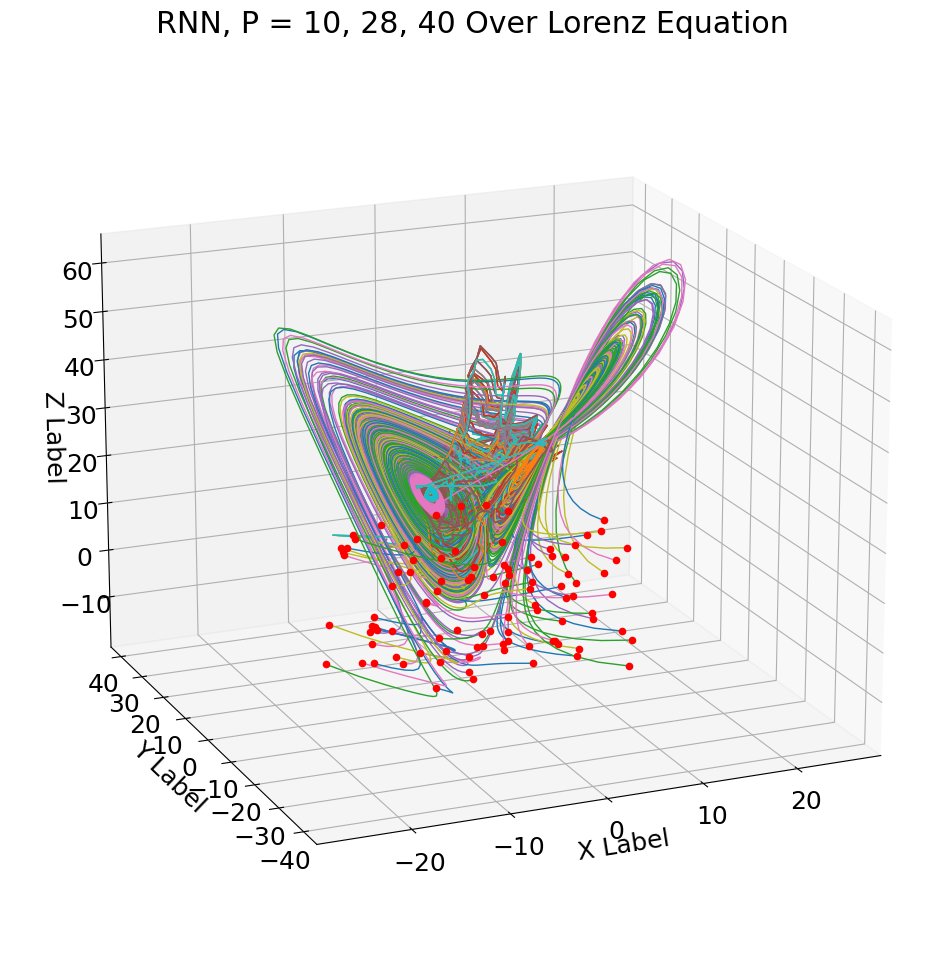

In [15]:
# Plotting Predictions on top of Graph
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
n_steps = [10, 28, 40]  # number of steps to predict into the future

for j in range(100):
    x, y, z = x_t[j, :, :].T
    ax.plot(x, y, z, linewidth=1)
    ax.scatter(x0[j, 0], x0[j, 1], x0[j, 2], color='r')

    # predict the trajectory for each n_steps
    for n in n_steps:
        predicted_trajectory = RNNmodel.predict(x_t[j, :-n, :])
        x, y, z = predicted_trajectory.T
        ax.plot(x, y, z, linewidth=1)

ax.view_init(18, -113)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('RNN, P = 10, 28, 40 Over Lorenz Equation')

plt.show()

In [16]:
# Test with p = 17, 35
RNNscore = RNNmodel.evaluate(X_test_17_35, Y_test_17_35, verbose=0)
print('Test loss:', RNNscore[0])
print('Test accuracy:', RNNscore[1])

Test loss: 17.934255599975586
Test accuracy: 0.9918516278266907


24/24 [==============================] - 0s 2ms/step


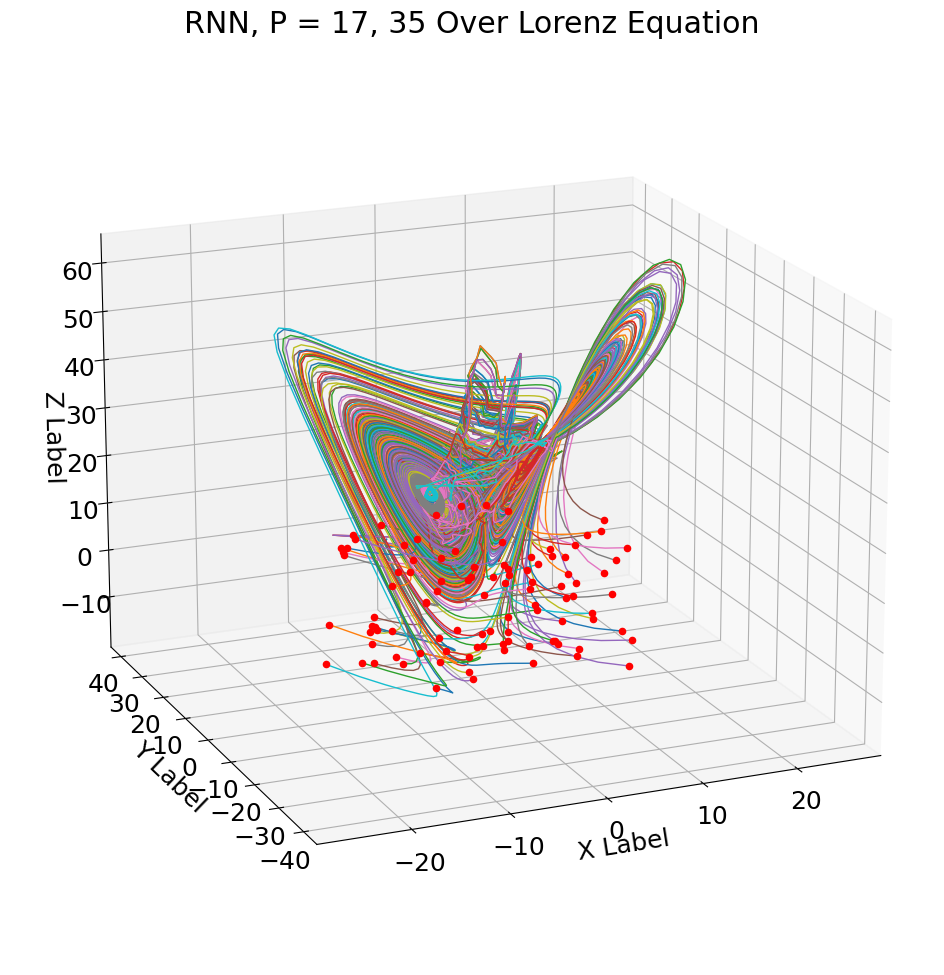

In [17]:
# Plotting Predictions on top of Graph
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
n_steps = [17, 35]  # number of steps to predict into the future

for j in range(100):
    x, y, z = x_t[j, :, :].T
    ax.plot(x, y, z, linewidth=1)
    ax.scatter(x0[j, 0], x0[j, 1], x0[j, 2], color='r')

    # predict the trajectory for each n_steps
    for n in n_steps:
        predicted_trajectory = RNNmodel.predict(x_t[j, :-n, :])
        x, y, z = predicted_trajectory.T
        ax.plot(x, y, z, linewidth=1)

ax.view_init(18, -113)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('RNN, P = 17, 35 Over Lorenz Equation')

plt.show()

## Echo State Network

In [18]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

class ESNLayer(layers.Layer):
    def __init__(self, units, spectral_radius, regularizer=None, **kwargs):
        self.units = units
        self.spectral_radius = spectral_radius
        self.regularizer = regularizers.get(regularizer)
        super(ESNLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W_in = self.add_weight(
            name='input_weight',
            shape=(input_shape[-1], self.units),
            initializer='uniform',
            trainable=True
        )
        self.W = self.add_weight(
            name='reservoir_weight',
            shape=(self.units, self.units),
            initializer='uniform',
            trainable=False
        )
        self.W = self.W * self.spectral_radius / max(np.abs(np.linalg.eigvals(self.W)))
        self.b = self.add_weight(
            name='bias',
            shape=(self.units,),
            initializer='zeros',
            trainable=True
        )
        self.built = True

    def call(self, inputs):
        W_in = self.W_in
        W = self.W
        b = self.b
        states = []
        for i in range(inputs.shape[1]):
            if i == 0:
                state = keras.activations.relu(inputs[:, i, :] @ W_in + b)
            else:
                state = keras.activations.relu(inputs[:, i, :] @ W_in + state @ W + b)
            states.append(state)
        output = keras.layers.concatenate(states)
        return output

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1] * self.units)

input_shape = (3, 1)
esn_units = 128
esn_spectral_radius = 0.9
esn_regularizer = None

input_layer = layers.Input(input_shape)
esn_layer = ESNLayer(units=esn_units, spectral_radius=esn_spectral_radius, regularizer=esn_regularizer)(input_layer)
output_layer = layers.Dense(3, activation='linear')(esn_layer)

ESNmodel = keras.Model(inputs=input_layer, outputs=output_layer)


In [19]:
# Compile the model
ESNmodel.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

# Train the model
ESNmodel.fit(X_train, Y_train, epochs=50, batch_size=128, validation_data=(X_test, Y_test))

# Evaluate the model
ESNscore = ESNmodel.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', ESNscore[0])
print('Test accuracy:', ESNscore[1])

Epoch 1/50
1454/1454 [==============================] - 7s 4ms/step - loss: 26.8415 - accuracy: 0.9904 - val_loss: 26.1762 - val_accuracy: 0.9910
Epoch 2/50
1454/1454 [==============================] - 7s 5ms/step - loss: 24.4449 - accuracy: 0.9911 - val_loss: 24.5803 - val_accuracy: 0.9910
Epoch 3/50
1454/1454 [==============================] - 8s 5ms/step - loss: 24.1629 - accuracy: 0.9911 - val_loss: 24.9951 - val_accuracy: 0.9910
Epoch 4/50
1454/1454 [==============================] - 8s 5ms/step - loss: 24.0116 - accuracy: 0.9911 - val_loss: 23.8554 - val_accuracy: 0.9910
Epoch 5/50
1454/1454 [==============================] - 8s 5ms/step - loss: 23.9764 - accuracy: 0.9911 - val_loss: 24.5571 - val_accuracy: 0.9910
Epoch 6/50
1454/1454 [==============================] - 7s 5ms/step - loss: 23.9137 - accuracy: 0.9911 - val_loss: 24.0197 - val_accuracy: 0.9910
Epoch 7/50
1454/1454 [==============================] - 8s 5ms/step - loss: 23.9658 - accuracy: 0.9911 - val_loss: 24.0884 -

24/24 [==============================] - 0s 1ms/step


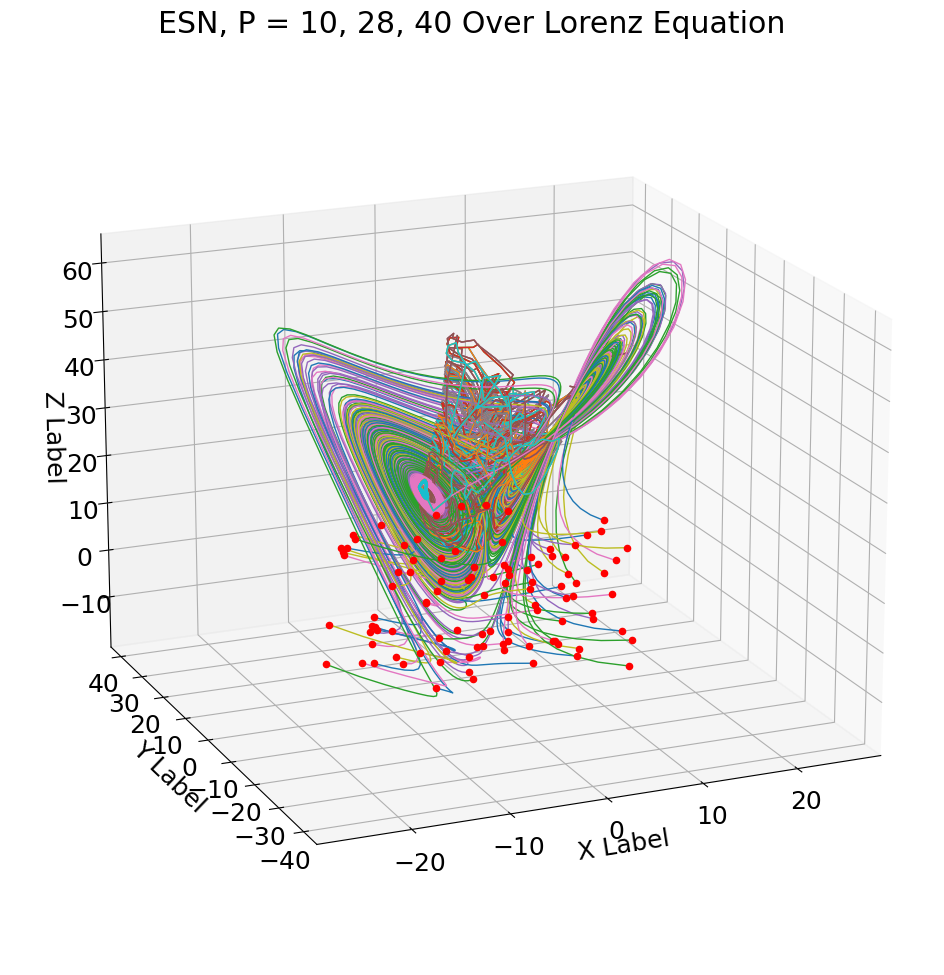

In [20]:
# Plotting Predictions on top of Graph
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
n_steps = [10, 28, 40]  # number of steps to predict into the future

for j in range(100):
    x, y, z = x_t[j, :, :].T
    ax.plot(x, y, z, linewidth=1)
    ax.scatter(x0[j, 0], x0[j, 1], x0[j, 2], color='r')

    # predict the trajectory for each n_steps
    for n in n_steps:
        predicted_trajectory = ESNmodel.predict(x_t[j, :-n, :])
        x, y, z = predicted_trajectory.T
        ax.plot(x, y, z, linewidth=1)

ax.view_init(18, -113)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('ESN, P = 10, 28, 40 Over Lorenz Equation')

plt.show()

In [21]:
# Test with p = 17, 35
ESNscore = ESNmodel.evaluate(X_test_17_35, Y_test_17_35, verbose=0)
print('Test loss:', ESNscore[0])
print('Test accuracy:', ESNscore[1])

Test loss: 19.474897384643555
Test accuracy: 0.9918516278266907


24/24 [==============================] - 0s 917us/step


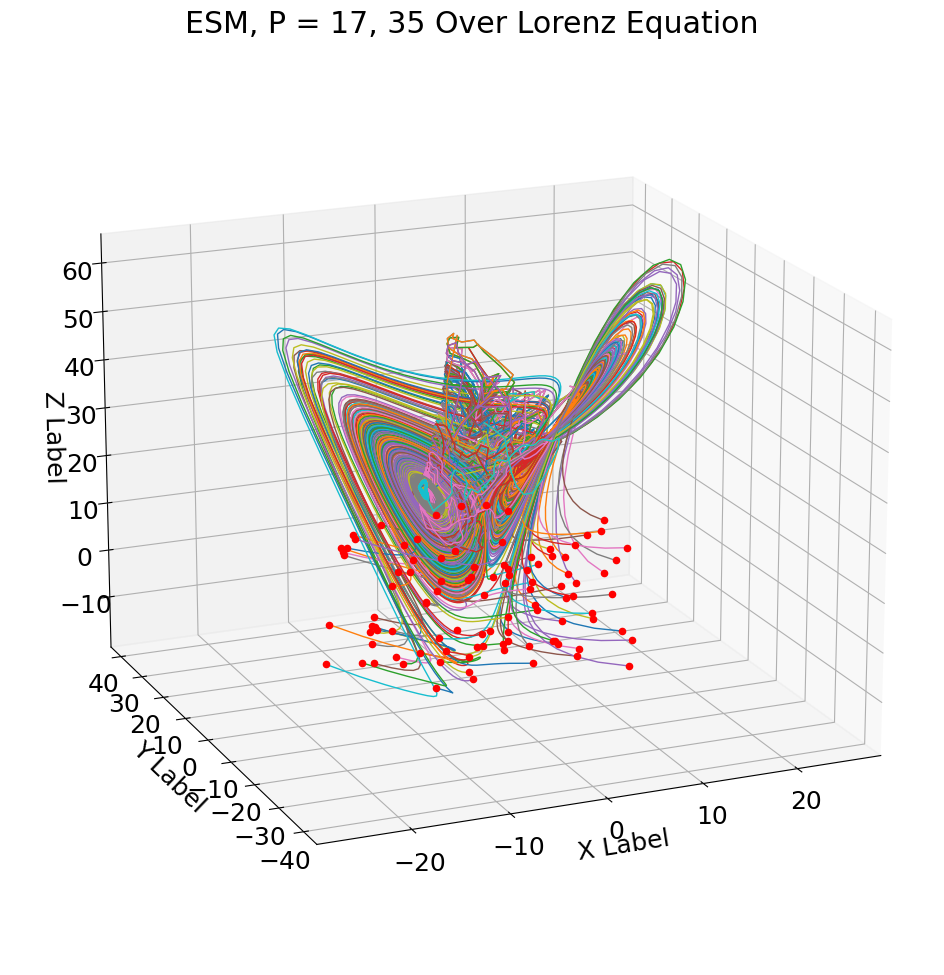

In [22]:
# Plotting Predictions on top of Graph
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
n_steps = [17, 35]  # number of steps to predict into the future

for j in range(100):
    x, y, z = x_t[j, :, :].T
    ax.plot(x, y, z, linewidth=1)
    ax.scatter(x0[j, 0], x0[j, 1], x0[j, 2], color='r')

    # predict the trajectory for each n_steps
    for n in n_steps:
        predicted_trajectory = ESNmodel.predict(x_t[j, :-n, :])
        x, y, z = predicted_trajectory.T
        ax.plot(x, y, z, linewidth=1)

ax.view_init(18, -113)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('ESM, P = 17, 35 Over Lorenz Equation')

plt.show()